In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Consumer creditworthiness train data.xlsx')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [3]:
df.shape

(521, 13)

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

- looks like there are lot of data missing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


#### We already have the index as the unique identifier so no need of Loan ID column

In [10]:
df = df.drop('Loan_ID',axis=1)

## Dealing with the missing Data

- from the above observation of missing data we had only the counts
- It would be great if we had a ratio of the missing data in each feature so that we could decide weather to fill the missing cells, remove the rows or remove the feature itself

In [12]:
def percent_missing(df):
    percent_misg = 100*df.isnull().sum()/len(df)
    percent_misg = percent_misg[percent_misg>0].sort_values()
    
    return percent_misg

In [13]:
percent_misg = percent_missing(df)
percent_misg

Married             0.575816
Gender              1.919386
Dependents          2.495202
Loan_Amount_Term    2.687140
Self_Employed       5.182342
Credit_History      8.253359
dtype: float64

## Bar plot for missing data

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

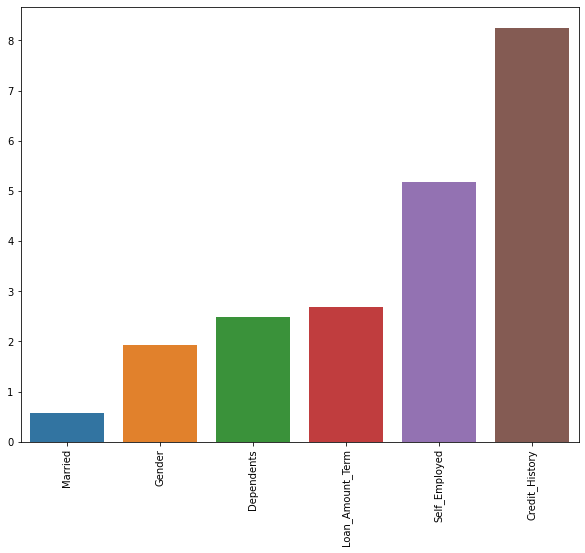

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x=percent_misg.index,y=percent_misg)
plt.xticks(rotation=90);

**Lets work on the observation that are less than 1%**

- for such observations we can either consider removing those rows or Filling them with a reasonable value based of domain knowledge
- we only have one feature that is <1% missing


In [31]:
df[df['Loan_Amount_Term']<400]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
515,Male,Yes,3+,Graduate,No,779850,771300.0,300000,360.0,1.0,Rural,Y
517,Male,Yes,NaN,Not Graduate,No,691650,405000.0,246000,360.0,0.0,Semiurban,N
518,Male,No,0,Graduate,No,1053675,430875.0,370000,360.0,1.0,Semiurban,N
519,Female,No,0,Not Graduate,No,765000,0.0,190000,360.0,1.0,Rural,N
